In [155]:
import pandas as pd  

In [156]:
df = pd.read_csv("data-transaksi2.csv")

In [157]:
df.head(10)

,Transaction,Item,date_time
0,1,_tt_L160,2024-01-05
1,2,_tt_A+B120,2024-01-09
2,3,_tt_160,2024-01-25
3,4,_tt_120,2024-01-19
4,5,_tt_140,2024-01-30
5,6,_set_tamu_2111,2024-01-30
6,7,_set_tamu_2111,2024-01-11
7,7,_tt_160,2024-01-05
8,8,_tt_160,2024-01-23
9,9,_mm_kamar,2024-01-10


In [158]:
from mlxtend.frequent_patterns import association_rules, apriori

In [159]:
item_count = df.groupby(["Transaction", "Item"])["Item"].count().reset_index(name="Count")
item_count.head(10)

,Transaction,Item,Count
0,1,_tt_L160,1
1,2,_tt_A+B120,1
2,3,_tt_160,1
3,4,_tt_120,1
4,5,_tt_140,1
5,6,_set_tamu_2111,1
6,7,_set_tamu_2111,1
7,7,_tt_160,1
8,8,_tt_160,1
9,9,_lemari_P2G,1


In [160]:
item_count_pivot = item_count.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
print("Ukuran Dataset :",item_count_pivot.shape)
item_count_pivot.head()

Ukuran Dataset : (567, 91)


Item,_L100,_L200,_Lm_70x110,_Lm_P2G+L,_Lmm,_Lmm_tv,__meja_tv_150,__tt_160,_kursi_bale_jati,_kursi_males,...,_tt_L160,_tt_L160L,_tt_L160R,_tt_L180,_tt_L180L,_tt_L180R,_tt_L200,_tt_L200L,_tt_L90,rak_sepatu+kursi
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head

<bound method NDFrame.head of Item         _L100  _L200  _Lm_70x110  _Lm_P2G+L  _Lmm  _Lmm_tv  \
Transaction                                                       
1                0      0           0          0     0        0   
2                0      0           0          0     0        0   
3                0      0           0          0     0        0   
4                0      0           0          0     0        0   
5                0      0           0          0     0        0   
...            ...    ...         ...        ...   ...      ...   
640              0      0           0          0     0        0   
641              0      0           0          0     0        0   
642              0      0           0          0     0        0   
643              0      0           0          0     0        0   
646              0      0           0          0     0        0   

Item         __meja_tv_150  __tt_160  _kursi_bale_jati  _kursi_males  ...  \
Transaction          

In [171]:
print("Ukuran Dataset: ", item_count_pivot.shape)
print("Jumlah Transaksi: ", item_count_pivot.shape[0])
print("Jumlah Items: ", item_count_pivot.shape[1])

Ukuran Dataset:  (567, 91)
Jumlah Transaksi:  567
Jumlah Items:  91


In [163]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d')
# df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

In [164]:
df['year_month_day'] = df['date_time'].dt.to_period('D')

In [165]:


daily_transactions = df.groupby('year_month_day')['Transaction'].nunique().reset_index()

daily_transactions.columns = ['date', 'unique_transactions']


print(daily_transactions)


specific_day = '2024-01-01'
total_unique_transactions_specific_day = daily_transactions[daily_transactions['date'] == specific_day]['unique_transactions'].sum()
print(f"Total unique transactions on {specific_day}: {total_unique_transactions_specific_day}")


           date  unique_transactions
0    2024-01-01                    5
1    2024-01-02                    4
2    2024-01-03                    7
3    2024-01-04                    4
4    2024-01-05                    3
..          ...                  ...
170  2024-06-25                    2
171  2024-06-26                    4
172  2024-06-27                    8
173  2024-06-28                    4
174  2024-06-29                    7

[175 rows x 2 columns]
Total unique transactions on 2024-01-01: 5


In [166]:
specific_day = '2024-01-01'
total_unique_transactions_specific_day = daily_transactions[daily_transactions['date'] == specific_day]['unique_transactions'].sum()
print(f"Total unique transactions on {specific_day}: {total_unique_transactions_specific_day}")

# Checking the total unique transactions for each month to ensure data integrity
df['year_month'] = pd.to_datetime(df['date_time']).dt.to_period('M')
monthly_transactions = df.groupby('year_month')['Transaction'].nunique().reset_index()
monthly_transactions.columns = ['year_month', 'unique_transactions']

# Displaying the dataframes
print("Daily Unique Transactions:")
print(daily_transactions.head())

print("Monthly Unique Transactions:")
print(monthly_transactions.head())

Total unique transactions on 2024-01-01: 5
Daily Unique Transactions:
         date  unique_transactions
0  2024-01-01                    5
1  2024-01-02                    4
2  2024-01-03                    7
3  2024-01-04                    4
4  2024-01-05                    3
Monthly Unique Transactions:
  year_month  unique_transactions
0    2024-01                  143
1    2024-02                  100
2    2024-03                  131
3    2024-04                   85
4    2024-05                  135


C:\Users\ANN PROJECTS\AppData\Local\Temp\ipykernel_7272\4240705667.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)
c:\Users\ANN PROJECTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


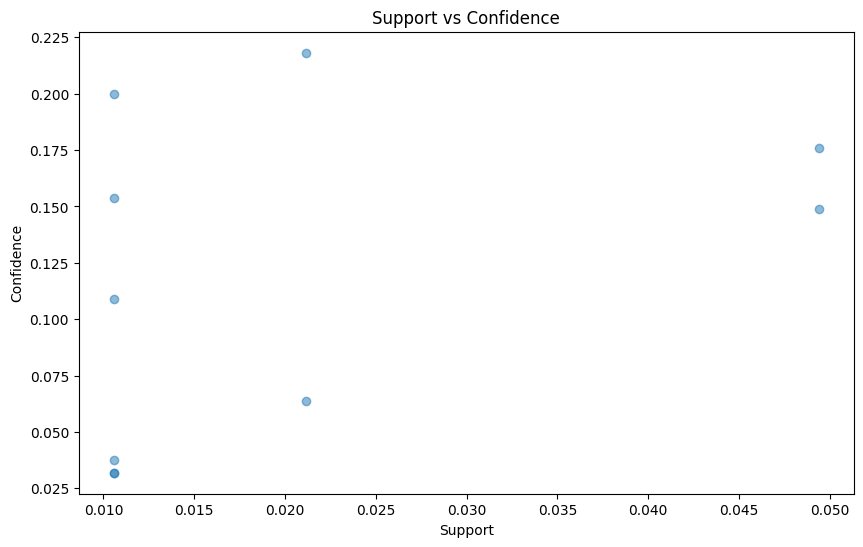

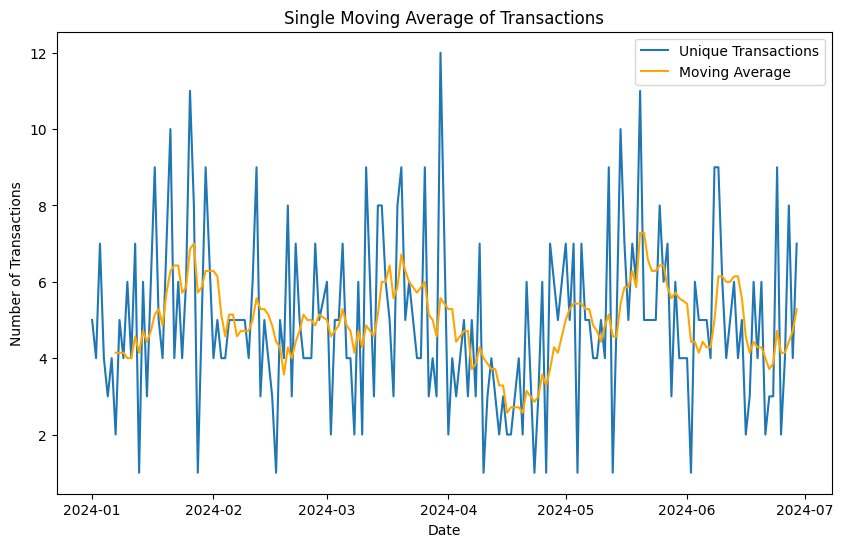

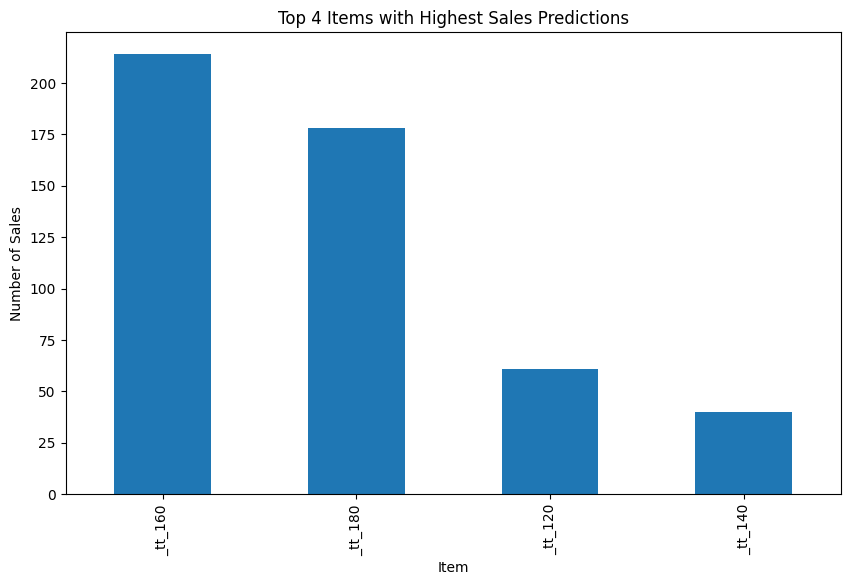

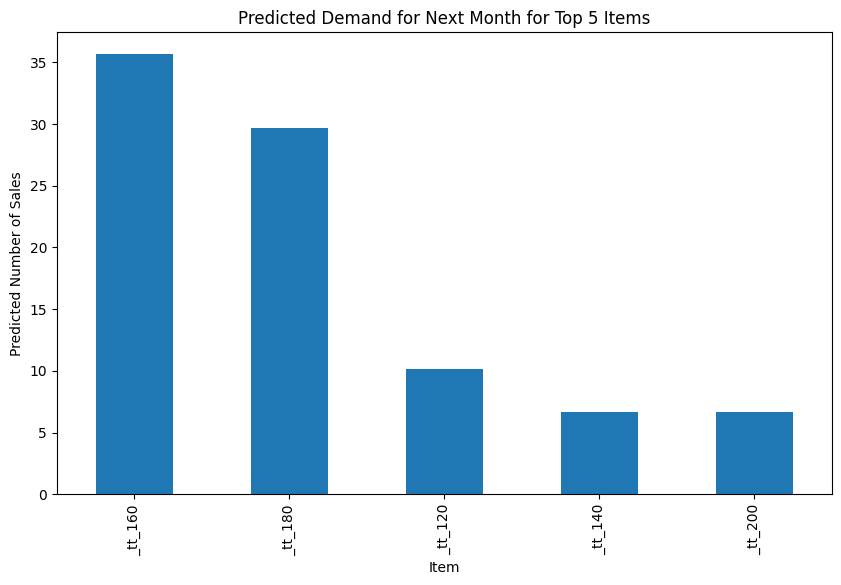

(     support                      itemsets
 0   0.015873               (_lemari_sudut)
 1   0.014109                (_meja_tv_100)
 2   0.015873                (_meja_tv_150)
 3   0.010582                   (_mm_kamar)
 4   0.052910           (_rak_sepatu+kursi)
 5   0.015873                  (_set_sudut)
 6   0.051146              (_set_tamu_2111)
 7   0.010582            (_set_tamu_2111TK)
 8   0.024691         (_set_tamu_sedan_211)
 9   0.024691                     (_tt_100)
 10  0.097002                     (_tt_120)
 11  0.068783                     (_tt_140)
 12  0.331570                     (_tt_160)
 13  0.280423                     (_tt_180)
 14  0.063492                     (_tt_200)
 15  0.012346                      (_tt_90)
 16  0.014109                  (_tt_A+B100)
 17  0.017637                  (_tt_A+B120)
 18  0.029982                    (_tt_L160)
 19  0.015873                   (_tt_L160L)
 20  0.010582                   (_tt_L160R)
 21  0.010582  (_rak_sepatu+kurs

In [167]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt


# Prepare the data for the Apriori algorithm
basket = (df.groupby(['Transaction', 'Item'])['Item']
          .count().unstack().reset_index().fillna(0)
          .set_index('Transaction'))

# Convert values to 1 and 0
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Apply the Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)

# Plot 1: Support and Confidence of Items
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Extracting date for daily transactions
df['date'] = df['date_time'].dt.date

# Calculating daily unique transactions
daily_transactions = df.groupby('date')['Transaction'].nunique().reset_index()
daily_transactions.columns = ['date', 'unique_transactions']

# Apply Single Moving Average
window_size = 7
daily_transactions['moving_average'] = daily_transactions['unique_transactions'].rolling(window=window_size).mean()

# Plot 2: Single Moving Average of Transactions
plt.figure(figsize=(10, 6))
plt.plot(daily_transactions['date'], daily_transactions['unique_transactions'], label='Unique Transactions')
plt.plot(daily_transactions['date'], daily_transactions['moving_average'], label='Moving Average', color='orange')
plt.title('Single Moving Average of Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

# Plot 3: Top 4 Items with Highest Sales Predictions
top_items = df['Item'].value_counts().head(4)
top_items.plot(kind='bar', figsize=(10, 6))
plt.title('Top 4 Items with Highest Sales Predictions')
plt.xlabel('Item')
plt.ylabel('Number of Sales')
plt.show()

# Predicting next month's demand for the top 5 items
df['year_month'] = df['date_time'].dt.to_period('M')
monthly_sales = df.groupby(['year_month', 'Item']).size().reset_index(name='count')
top_5_items = df['Item'].value_counts().head(5).index

predictions = {}
for item in top_5_items:
    item_sales = monthly_sales[monthly_sales['Item'] == item]
    avg_sales_per_month = item_sales['count'].mean()
    predictions[item] = avg_sales_per_month

# Plot 4: Predicted Demand for Next Month for Top 5 Items
plt.figure(figsize=(10, 6))
pd.Series(predictions).plot(kind='bar')
plt.title('Predicted Demand for Next Month for Top 5 Items')
plt.xlabel('Item')
plt.ylabel('Predicted Number of Sales')
plt.show()

# Display the results
frequent_itemsets, rules[['antecedents', 'consequents', 'support', 'confidence']], daily_transactions.head(20), top_items, predictions





In [168]:
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


           antecedents          consequents   support  confidence
0  (_rak_sepatu+kursi)            (_tt_160)  0.010582    0.200000
1            (_tt_160)  (_rak_sepatu+kursi)  0.010582    0.031915
2            (_tt_120)            (_tt_160)  0.021164    0.218182
3            (_tt_160)            (_tt_120)  0.021164    0.063830
4            (_tt_120)            (_tt_180)  0.010582    0.109091
5            (_tt_180)            (_tt_120)  0.010582    0.037736
6            (_tt_140)            (_tt_160)  0.010582    0.153846
7            (_tt_160)            (_tt_140)  0.010582    0.031915
8            (_tt_180)            (_tt_160)  0.049383    0.176101
9            (_tt_160)            (_tt_180)  0.049383    0.148936
